## Import libraries

In [1]:
import numpy as np
from numpy import linalg
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime
np.random.seed(123456)

## Load data

In [2]:
X, y = datasets.load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123456)

## Results using Sklearn

In [3]:
linReg = linear_model.LinearRegression()
start = datetime.now()
_ = linReg.fit(X=X_train, y=y_train)
end = datetime.now()
print("Time taken = {}".format(end - start))
print("Train R-square = {}".format(linReg.score(X_train, y_train)))
print("Test R-square = {}".format(linReg.score(X_test, y_test)))

Time taken = 0:00:00.079598
Train R-square = 0.7280149810444595
Test R-square = 0.7613410334735791


## Residual plot
#### Using sklearn model
Ideally, we should not see any pattern, periodicity, divergence, linear or polynomial relationship between axes.

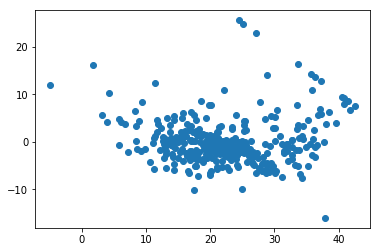

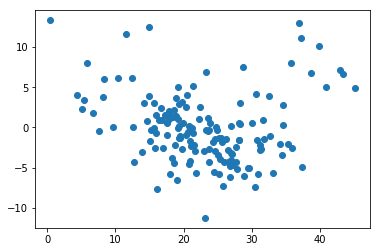

In [4]:
predictions_train = linReg.predict(X_train)
predictions_test = linReg.predict(X_test)

# Plot train and test separately
plt.scatter(predictions_train, y_train - predictions_train)
plt.figure(2)
plt.scatter(predictions_test, y_test - predictions_test)
plt.show()

## Use our own function
#### using matrix inverse method (what is it called?)
TODO(nviladkar@gmail.com) : Add reference for the formula proof.

In [5]:
def myLinearRegression(X=None, y=None):
    '''
    X : numpy ndarray of dimension n x p. n is number of rows,
        p is number of columns
    y : numpy array of target values of dimension n x 1.
    Return : beta coeffiecients. First coeff is for bais.
             Dimension : p+1 x 1
    '''
    # append 1 to each train data point to represent bias coeff
    a = np.reshape([[1] * X.shape[0]], (-1, 1))
    X_lr = np.append(a, X, axis=1)
    
    # find estimate to beta parameters
    # beta_hat = inv(x'x) * x' * y
    beta_hat = np.matmul(np.matmul(linalg.inv(np.matmul(np.transpose(X_lr), X_lr)), np.transpose(X_lr)), y)
    
    return beta_hat

## Our function is accurate. But are we faster than sklearn?
May be for data of this small size!

In [6]:
start = datetime.now()
beta_hat = myLinearRegression(X=X_train, y=y_train)
end = datetime.now()

print("Time taken = {}".format(end - start))

# Test for correctness - emulate fit process by assigning coeffs.
mylinReg = linear_model.LinearRegression()
mylinReg.coef_ = beta_hat[1:]
mylinReg.intercept_ = beta_hat[0]

print(mylinReg.score(X_train, y_train))
print(mylinReg.score(X_test, y_test))

Time taken = 0:00:00.011418
0.7280149810444594
0.7613410334735645


## Residual plot
#### Using our model
Ideally we should see exactly same plots

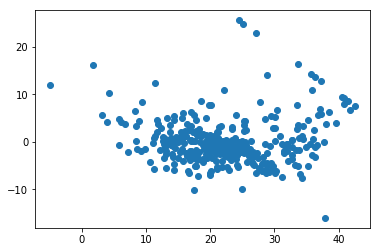

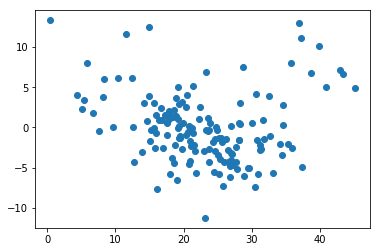

In [7]:
predictions_train = mylinReg.predict(X_train)
predictions_test = mylinReg.predict(X_test)

# Plot train and test separately
plt.scatter(predictions_train, y_train - predictions_train)
plt.figure(2)
plt.scatter(predictions_test, y_test - predictions_test)
plt.show()